PIL size: (300, 300)


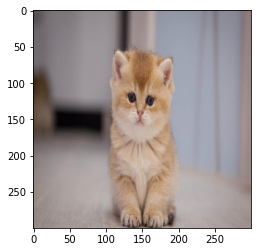

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications import (
        vgg16,
        resnet50,
        mobilenet,
        inception_v3
    )

PIL size: (299, 299)
np size array (299, 299, 3)
image batch size (1, 299, 299, 3)


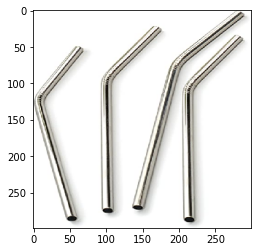

In [26]:
# init the models
vgg_model = vgg16.VGG16(weights='imagenet')

inception_model = inception_v3.InceptionV3(weights='imagenet')

resnet_model = resnet50.ResNet50(weights='imagenet')

mobilenet_model = mobilenet.MobileNet(weights='imagenet')

filename = 'metal.jpg'
original = load_img(filename, target_size=(299, 299))
print('PIL size:', original.size) # w, h, channel
plt.imshow(original)

np_image = img_to_array(original) # h, w, channel
print('np size array', np_image.shape)

image_batch = np.expand_dims(np_image, axis=0) # batchsize, h, w, channel
print('image batch size', image_batch.shape)

In [27]:
#Preprocess the input by subtracting the mean value from each channel
#of the images in the batch. Mean is an array of 
#three elements obtained by the average of R, G, B pixels 
#of all images obtained from ImageNet.
processed_img = inception_v3.preprocess_input(image_batch.copy())

#get predicted probab for each class
predictions = inception_model.predict(processed_img)
label_vgg = decode_predictions(predictions)
for pred in range(len(label_vgg[0])):
    print(label_vgg[0][pred])

('n03532672', 'hook', 0.66090447)
('n02951585', 'can_opener', 0.110907204)
('n02966687', "carpenter's_kit", 0.071481496)
('n03804744', 'nail', 0.024490118)
('n04154565', 'screwdriver', 0.009738617)
